In [1]:
#Importation of all API's that will be used (will expand as use cases crop up that need solving)

import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline
import scipy
from seaborn import clustermap
from scipy.stats import ttest_ind
import pprint

In [2]:
# Import Source document with only the columns that are needed for intended analysis

rawdata_MycoDB = pd.read_csv("MycoDB_version1.csv", usecols = ["PlantFamily", "PlantSpecies", "FungalGenus", "PLANTLIFEHISTORY", "FUNGROUP"])
rawdata_BFIBundle = pd.read_csv("bfi-source.csv", usecols = ["Fungal_host_taxa", "Bacterial_associate_taxa"])

In [3]:
#Test to see if imported correctly

print (rawdata_MycoDB)
print (rawdata_BFIBundle)

     PlantFamily       PlantSpecies      FungalGenus PLANTLIFEHISTORY  \
0       fabaceae  vigna_unguiculata              NaN  annual_biennial   
1       fabaceae  vigna_unguiculata  claroideoglomus  annual_biennial   
2       fabaceae      cajanus_cajan  claroideoglomus        perennial   
3       fabaceae   arachis_hypogaea              NaN  annual_biennial   
4       fabaceae   arachis_hypogaea  claroideoglomus  annual_biennial   
...          ...                ...              ...              ...   
4005  betulaceae   alnus_tenuifolia           alpova        perennial   
4006  betulaceae   alnus_tenuifolia           alpova        perennial   
4007  betulaceae   alnus_tenuifolia           alpova        perennial   
4008  betulaceae   alnus_tenuifolia           alpova        perennial   
4009  betulaceae   alnus_tenuifolia           alpova        perennial   

      FUNGROUP  
0     Nfixforb  
1     Nfixforb  
2     Nfixforb  
3     Nfixforb  
4     Nfixforb  
...        ...  
4005

In [4]:
#Removing columns that lack full data so that it cannot mess with future testing (primarly only fungal genus infomation missing in source data)

rawdata_MycoDB_na = rawdata_MycoDB.dropna()
rawdata_BFIBundle_na = rawdata_BFIBundle.dropna()

In [5]:
#Test to see if removal of NaN data worked as intended

print (rawdata_MycoDB_na)
print (rawdata_BFIBundle_na)

     PlantFamily       PlantSpecies      FungalGenus PLANTLIFEHISTORY  \
1       fabaceae  vigna_unguiculata  claroideoglomus  annual_biennial   
2       fabaceae      cajanus_cajan  claroideoglomus        perennial   
4       fabaceae   arachis_hypogaea  claroideoglomus  annual_biennial   
5       fabaceae  vigna_unguiculata        gigaspora  annual_biennial   
7       fabaceae  vigna_unguiculata        gigaspora  annual_biennial   
...          ...                ...              ...              ...   
4005  betulaceae   alnus_tenuifolia           alpova        perennial   
4006  betulaceae   alnus_tenuifolia           alpova        perennial   
4007  betulaceae   alnus_tenuifolia           alpova        perennial   
4008  betulaceae   alnus_tenuifolia           alpova        perennial   
4009  betulaceae   alnus_tenuifolia           alpova        perennial   

      FUNGROUP  
1     Nfixforb  
2     Nfixforb  
4     Nfixforb  
5     Nfixforb  
7     Nfixforb  
...        ...  
4005

In [6]:
# Seperated MycoDB data by life histories so testing between them can occur and grpah creation simplified

filtered_rawdata_MycoDB_na_ab = rawdata_MycoDB_na[rawdata_MycoDB_na["PLANTLIFEHISTORY"].str.contains("annual_biennial")]
filtered_rawdata_MycoDB_na_p = rawdata_MycoDB_na[rawdata_MycoDB_na["PLANTLIFEHISTORY"].str.contains("perennial")]

In [7]:
# Test to see if seperation of data worked as intended

print (filtered_rawdata_MycoDB_na_ab)
print (filtered_rawdata_MycoDB_na_p)

     PlantFamily       PlantSpecies      FungalGenus PLANTLIFEHISTORY  \
1       fabaceae  vigna_unguiculata  claroideoglomus  annual_biennial   
4       fabaceae   arachis_hypogaea  claroideoglomus  annual_biennial   
5       fabaceae  vigna_unguiculata        gigaspora  annual_biennial   
7       fabaceae  vigna_unguiculata        gigaspora  annual_biennial   
13      fabaceae   arachis_hypogaea        gigaspora  annual_biennial   
...          ...                ...              ...              ...   
3678    pinaceae      pinus_radiata       rhizopogon  annual_biennial   
3679    pinaceae      pinus_radiata       rhizopogon  annual_biennial   
3680    pinaceae      pinus_radiata       rhizopogon  annual_biennial   
3681    pinaceae      pinus_radiata       rhizopogon  annual_biennial   
3682    pinaceae      pinus_radiata       rhizopogon  annual_biennial   

      FUNGROUP  
1     Nfixforb  
4     Nfixforb  
5     Nfixforb  
7     Nfixforb  
13    Nfixforb  
...        ...  
3678

In [8]:
#for all (Unique) plant speices in PlantSpecies, give amount of each (unique) Fungal genus in FungalGenus

counts = {}
for index, row in filtered_rawdata_MycoDB_na_ab.iterrows():
    plant = row["PlantSpecies"]
    fungus = row["FungalGenus"]
    if plant not in counts:
        counts[plant] = {}
    if fungus not in counts[plant]:
        counts[plant][fungus] = 0
    counts[plant][fungus] += 1
      
for plant in counts.keys():
    counts[plant]["total"] = sum(counts[plant].values())

print (counts)
counts_ab = counts

fungal_counts = {}
for plant in counts:
    for fungus in counts[plant]:
        if fungus not in fungal_counts:
            fungal_counts[fungus] = 0
        fungal_counts[fungus] += counts[plant][fungus]
#del fungal_counts["total"]
print(fungal_counts)
fungal_count_ab = fungal_counts

{'vigna_unguiculata': {'claroideoglomus': 4, 'gigaspora': 5, 'acaulospora': 11, 'rhizoglomus': 3, 'funneliformis': 2, 'sclerocystis': 10, 'total': 35}, 'arachis_hypogaea': {'claroideoglomus': 1, 'gigaspora': 2, 'funneliformis': 3, 'total': 6}, 'lactuca_sativa': {'rhizoglomus': 30, 'funneliformis': 30, 'glomus': 12, 'total': 72}, 'zea_mays': {'rhizoglomus': 86, 'claroideoglomus': 27, 'funneliformis': 60, 'acaulospora': 11, 'septoglomus': 10, 'gigaspora': 4, 'total': 198}, 'trifolium_subterraneum': {'rhizoglomus': 15, 'scutellospora': 8, 'glomus': 10, 'acaulospora': 2, 'gigaspora': 6, 'claroideoglomus': 8, 'total': 49}, 'glycine_max': {'claroideoglomus': 3, 'gigaspora': 12, 'funneliformis': 25, 'rhizoglomus': 10, 'glomus': 10, 'total': 60}, 'astragalus_sinicus': {'rhizoglomus': 5, 'gigaspora': 5, 'acaulospora': 5, 'total': 15}, 'pisum_sativum': {'rhizoglomus': 27, 'funneliformis': 20, 'total': 47}, 'kummerowia_striata': {'gigaspora': 1, 'total': 1}, 'cucumis_sativus': {'claroideoglomus':

In [9]:
#for all (Unique) plant speices in PlantSpecies, give amount of each (unique) Fungal genus in FungalGenus

counts = {}
for index, row in filtered_rawdata_MycoDB_na_p.iterrows():
    plant = row["PlantSpecies"]
    fungus = row["FungalGenus"]
    if plant not in counts:
        counts[plant] = {}
    if fungus not in counts[plant]:
        counts[plant][fungus] = 0
    counts[plant][fungus] += 1
      
for plant in counts.keys():
    counts[plant]["total"] = sum(counts[plant].values())

print (counts)
counts_p = counts

fungal_counts = {}
for plant in counts:
    for fungus in counts[plant]:
        if fungus not in fungal_counts:
            fungal_counts[fungus] = 0
        fungal_counts[fungus] += counts[plant][fungus]
#del fungal_counts["total"]
print(fungal_counts)
fungal_count_p = fungal_counts

{'cajanus_cajan': {'claroideoglomus': 1, 'gigaspora': 18, 'rhizoglomus': 8, 'funneliformis': 4, 'glomus': 4, 'total': 35}, 'olea_europaea': {'claroideoglomus': 3, 'rhizoglomus': 15, 'funneliformis': 13, 'septoglomus': 6, 'total': 37}, 'retama_sphaerocarpa': {'funneliformis': 6, 'rhizoglomus': 8, 'glomus': 6, 'claroideoglomus': 1, 'total': 21}, 'rhamnus_lycioides': {'claroideoglomus': 1, 'rhizoglomus': 2, 'total': 3}, 'otholobium_hirtum': {'acaulospora': 4, 'total': 4}, 'aspalathus_linearis': {'acaulospora': 4, 'total': 4}, 'panicum_amarum': {'claroideoglomus': 4, 'total': 4}, 'uniola_paniculata': {'claroideoglomus': 2, 'total': 2}, 'faidherbia_albida': {'rhizoglomus': 8, 'glomus': 5, 'total': 13}, 'ziziphus_mauritiana': {'glomus': 2, 'rhizoglomus': 3, 'funneliformis': 1, 'acaulospora': 1, 'total': 7}, 'tamarindus_indica': {'glomus': 2, 'rhizoglomus': 3, 'funneliformis': 1, 'acaulospora': 1, 'total': 7}, 'dialium_guineensis': {'glomus': 1, 'rhizoglomus': 1, 'total': 2}, 'parkia_biglobos

In [10]:
#Test to see if fungal_count extraction worked as intended

print (fungal_count_ab)
print (fungal_count_p)

{'claroideoglomus': 104, 'gigaspora': 85, 'acaulospora': 34, 'rhizoglomus': 362, 'funneliformis': 416, 'sclerocystis': 18, 'total': 1153, 'glomus': 80, 'septoglomus': 10, 'scutellospora': 20, 'diversispora': 2, 'racocetra': 1, 'dentiscutata': 3, 'cetraspora': 1, 'laccaria': 12, 'rhizopogon': 5}
{'claroideoglomus': 152, 'gigaspora': 116, 'rhizoglomus': 464, 'funneliformis': 216, 'glomus': 202, 'total': 2218, 'septoglomus': 16, 'acaulospora': 45, 'pisolithus': 345, 'thelephora': 13, 'scleroderma': 85, 'diversispora': 10, 'scutellospora': 25, 'boletus': 9, 'racocetra': 7, 'dentiscutata': 5, 'ambispora': 3, 'archaeospora': 1, 'laccaria': 146, 'descolea': 35, 'paxillus': 31, 'suillus': 52, 'cenococcum': 6, 'rhizopogon': 44, 'hebeloma': 44, 'piloderma': 17, 'cortinarius': 25, 'hysterangium': 13, 'hymenogaster': 15, 'amanita': 12, 'hydnangium': 9, 'austrogautieria': 1, 'hydnum': 1, 'hydnotrya': 1, 'descomyces': 1, 'mesophellia': 3, 'leucopaxillus': 1, 'tricholoma': 9, 'chondrogaster': 1, 'pro

In [166]:
#turn dict into df so combining into a three column df is possible
#turn dict into df so combining into a three column df is possible

#fungal_count_ab_df = pd.DataFrame.from_dict(fungal_count_ab, orient = "index")
#fungal_count_p_df = pd.DataFrame.from_dict(fungal_count_p, orient = "index")

plants_ab = counts_ab.keys()
#print(plants_ab)
fungi_ab = set()
for plant in counts_ab.keys():
    fungi_ab.update(counts_ab[plant].keys())
fungi_ab.remove("total")
#print (sorted(fungi_ab))

fungi_cols_ab = sorted(fungi_ab)
fungi_ab.add('')

heatmap_ab = []
#heatmap_ab.append(sorted(fungi_ab))
#print(heatmap_ab)

plants_rows_ab = sorted(counts_ab.keys())

for plant in sorted(counts_ab.keys()):
    new_row = []
  #  new_row.append(plant)
    for fungus in sorted(fungi_ab)[1:]:
        new_row.append(float(counts_ab[plant].get(fungus, 0)))
    heatmap_ab.append(new_row)
pprint.pprint(heatmap_ab)


plants_p = counts_p.keys()
#print(plants_p)
fungi_p = set()
for plant in counts_p.keys():
    fungi_p.update(counts_p[plant].keys())
fungi_p.remove("total")

#print (sorted(fungi_p))

fungi_cols_p = sorted(fungi_p)

heatmap_p = []
#heatmap_p.append(sorted(fungi_p))
#print(heatmap_p)
fungi_p.add('')
plants_rows_p = sorted(counts_p.keys())

for plant in sorted(counts_p.keys()):
    new_row = []
#    new_row.append(plant)
    for fungus in sorted(fungi_p)[1:]:
        new_row.append(float(counts_p[plant].get(fungus, 0)))
    heatmap_p.append(new_row)
pprint.pprint(heatmap_p)


[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 1.0, 0.0, 0.0, 3.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 0.0, 0.0, 0.0, 5.0, 0.0, 0.0, 0.0, 0.0],
 [4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 0.0, 0.0, 0.0, 1.0, 0.0, 4.0, 0.0, 0.0],
 [0.0, 0.0, 2.0, 0.0, 0.0, 2.0, 12.0, 7.0, 0.0, 0.0, 28.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 0.0, 0.0, 0.0, 0.0, 4.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 2.0, 0.0, 0.0, 3.0, 3.0, 3.0, 0.0, 0.0, 8.0, 0.0, 0.0, 1.0, 0.0],
 [0.0, 0.0, 0.0, 3.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 5.0, 0.0, 3.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0,
  0.0,
  3.0,
  0.0,
  0.0,
  25.0,
  12.0,
  10.0,
  0

In [167]:
heatmap_ab_df = pd.DataFrame(heatmap_ab)
heatmap_p_df = pd.DataFrame(heatmap_p)



print (heatmap_ab_df)
print (heatmap_p_df)

      0    1     2    3    4      5     6     7     8    9     10   11    12  \
0    0.0  0.0   0.0  0.0  0.0    0.0   0.0   1.0   0.0  0.0   1.0  0.0   0.0   
1    0.0  0.0   1.0  0.0  0.0    3.0   2.0   0.0   0.0  0.0   0.0  0.0   0.0   
2    5.0  0.0   0.0  0.0  0.0    0.0   5.0   0.0   0.0  0.0   5.0  0.0   0.0   
3    4.0  0.0   0.0  0.0  0.0    0.0   4.0   0.0   0.0  0.0   1.0  0.0   4.0   
4    0.0  0.0   2.0  0.0  0.0    2.0  12.0   7.0   0.0  0.0  28.0  0.0   0.0   
5    0.0  0.0   0.0  0.0  0.0    0.0   0.0   0.0   0.0  0.0   6.0  0.0   0.0   
6    0.0  0.0   0.0  0.0  0.0    4.0   0.0   0.0   0.0  0.0   4.0  0.0   0.0   
7    0.0  0.0   2.0  0.0  0.0    3.0   3.0   3.0   0.0  0.0   8.0  0.0   0.0   
8    0.0  0.0   0.0  3.0  0.0    3.0   0.0   0.0   0.0  0.0   5.0  0.0   3.0   
9    0.0  0.0   0.0  0.0  0.0    0.0   0.0   0.0   0.0  0.0   1.0  0.0   0.0   
10   0.0  0.0   0.0  0.0  0.0    2.0   0.0   0.0   0.0  0.0   0.0  0.0   0.0   
11   0.0  0.0   0.0  0.0  0.0    3.0   0

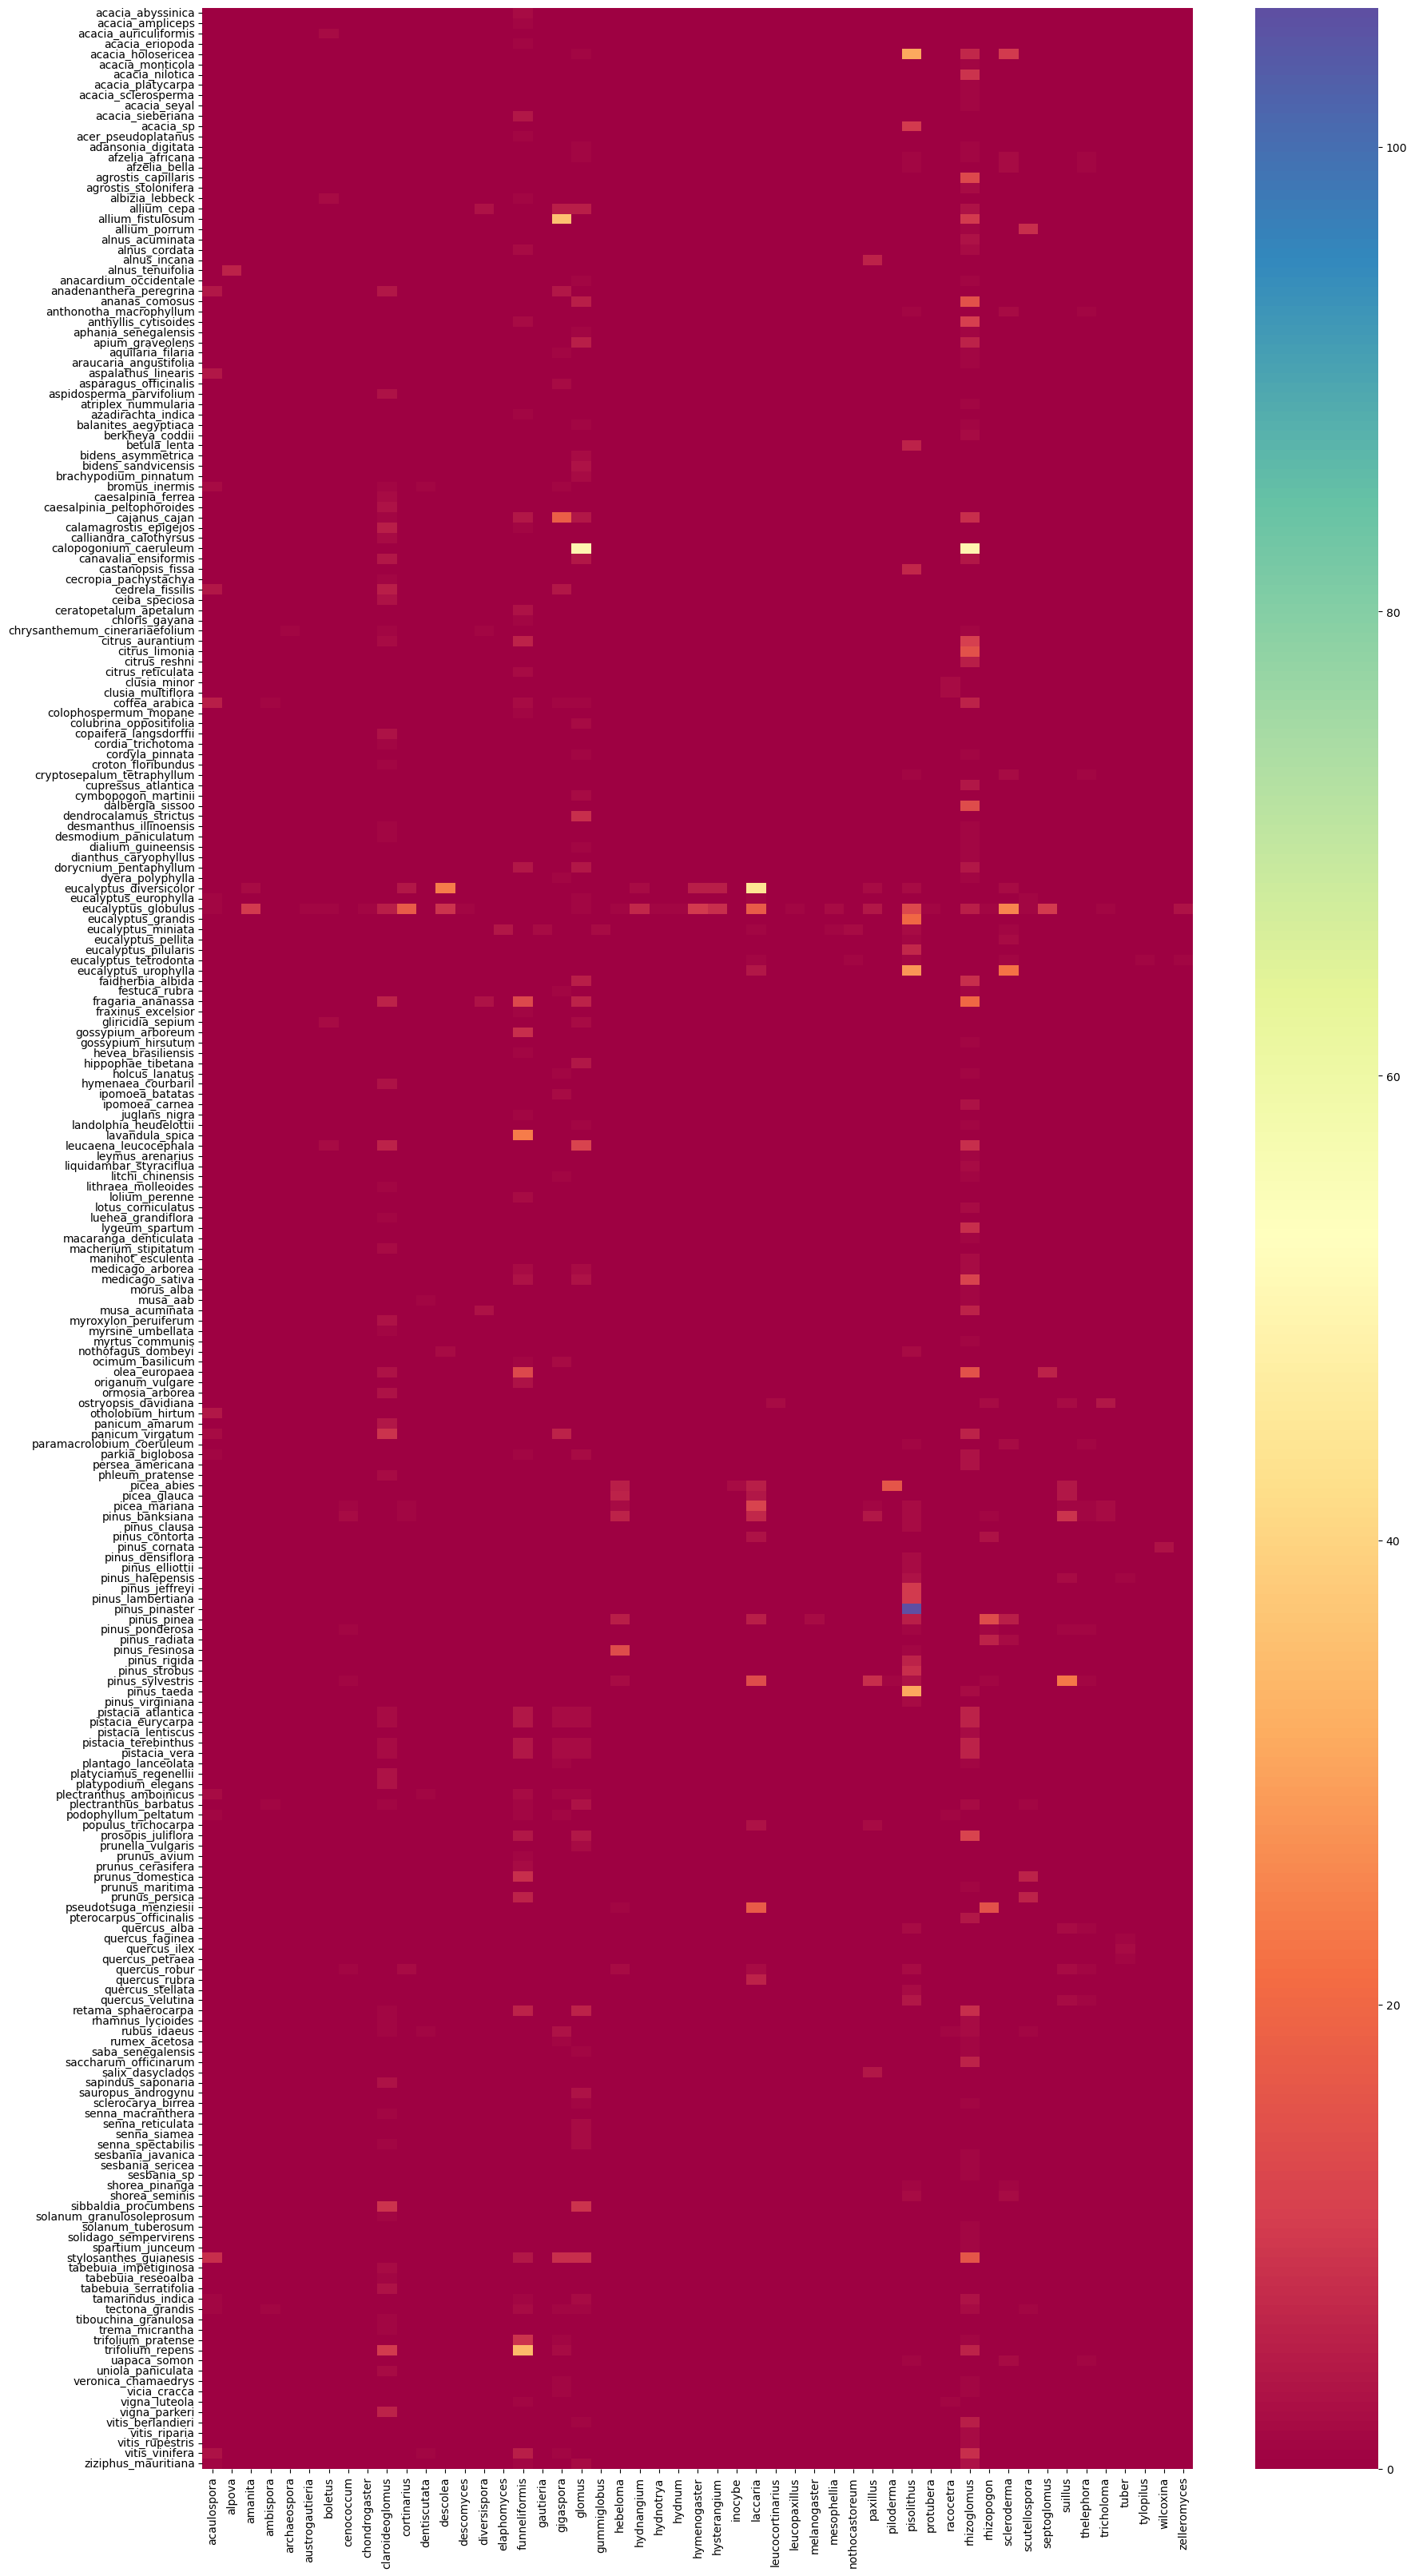

In [182]:


fig, ax = plt.subplots(figsize=(20,40))

heatmap_p_img = sns.heatmap(heatmap_p, cmap='Spectral', xticklabels=fungi_cols_p, yticklabels=plants_rows_p, ax=ax)


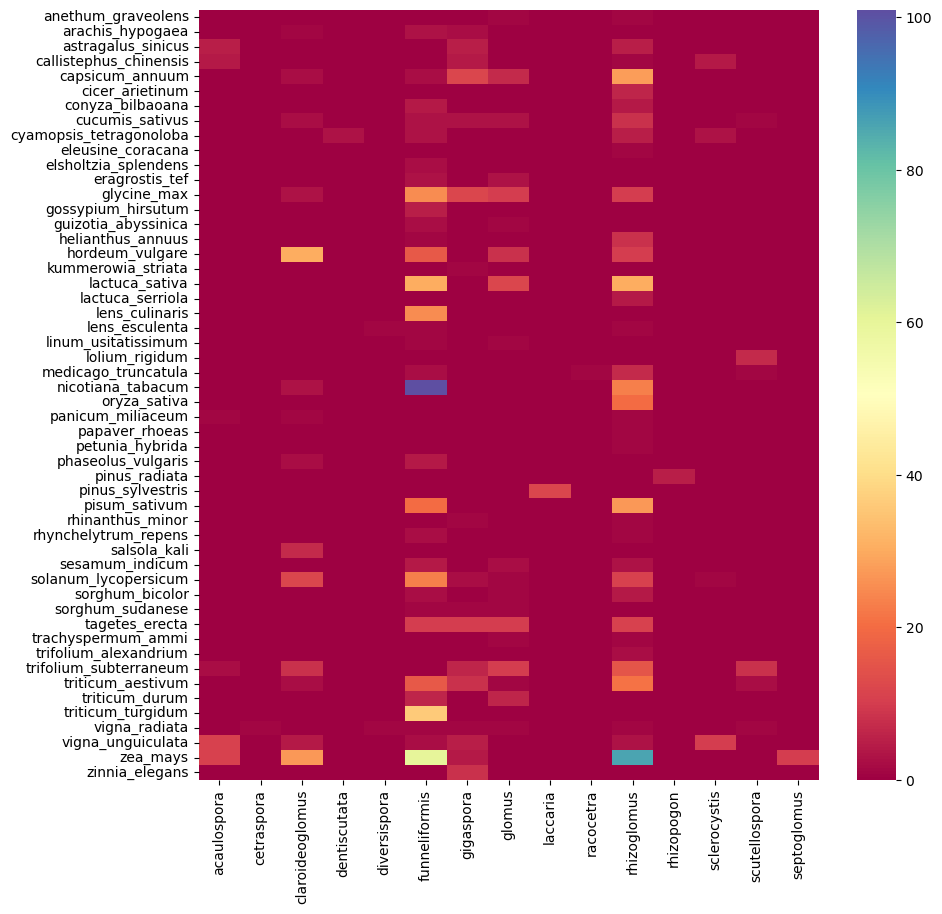

In [181]:
fig, ax = plt.subplots(figsize=(10,10))

heatmap_p_img = sns.heatmap(heatmap_ab, cmap='Spectral', xticklabels=fungi_cols_ab, yticklabels=plants_rows_ab, ax=ax)


In [124]:
plants_ab = counts_ab.keys()
#print(plants_ab)
fungi_ab = set()
for plant in counts_ab.keys():
    fungi_ab.update(counts_ab[plant].keys())
fungi_ab.remove("total")
fungi_ab.add('')
#print (sorted(fungi_ab))

fungi_cols_ab = sorted(fungi_ab)

heatmap_ab_la = []
heatmap_ab_la.append(sorted(fungi_ab))
#print(heatmap_ab)

plants_rows_ab = sorted(counts_ab.keys())

for plant in sorted(counts_ab.keys()):
    new_row = []
    new_row.append(plant)
    for fungus in sorted(fungi_ab)[1:]:
        new_row.append(float(counts_ab[plant].get(fungus, 0)))
    heatmap_ab_la.append(new_row)
pprint.pprint(heatmap_ab_la)


plants_p = counts_p.keys()
#print(plants_p)
fungi_p = set()
for plant in counts_p.keys():
    fungi_p.update(counts_p[plant].keys())
fungi_p.remove("total")
fungi_p.add('')
#print (sorted(fungi_p))

fungi_cols_p = sorted(fungi_p)

heatmap_p_la = []
heatmap_p_la.append(sorted(fungi_p))
#print(heatmap_p)

plants_rows_p = sorted(counts_p.keys())

for plant in sorted(counts_p.keys()):
    new_row = []
    new_row.append(plant)
    for fungus in sorted(fungi_p)[1:]:
        new_row.append(float(counts_p[plant].get(fungus, 0)))
    heatmap_p_la.append(new_row)
pprint.pprint(heatmap_p_la)


[['',
  'acaulospora',
  'cetraspora',
  'claroideoglomus',
  'dentiscutata',
  'diversispora',
  'funneliformis',
  'gigaspora',
  'glomus',
  'laccaria',
  'racocetra',
  'rhizoglomus',
  'rhizopogon',
  'sclerocystis',
  'scutellospora',
  'septoglomus'],
 ['anethum_graveolens',
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0],
 ['arachis_hypogaea',
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  3.0,
  2.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 ['astragalus_sinicus',
  5.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  5.0,
  0.0,
  0.0,
  0.0,
  5.0,
  0.0,
  0.0,
  0.0,
  0.0],
 ['callistephus_chinensis',
  4.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  4.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  4.0,
  0.0,
  0.0],
 ['capsicum_annuum',
  0.0,
  0.0,
  2.0,
  0.0,
  0.0,
  2.0,
  12.0,
  7.0,
  0.0,
  0.0,
  28.0,
  0.0,
  0.0,
  0.0,
  0.0],
 ['cicer_arietinum',
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,

In [127]:
heatmap_ab_la_df = pd.DataFrame(heatmap_ab_la)
heatmap_p_la_df = pd.DataFrame(heatmap_p_la)

heatmap_ab_la_df.to_csv('heatmap_ab_la_df.csv', sep=',', index=True, encoding='utf-8')
heatmap_p_la_df.to_csv('heatmap_p_la_df.csv', sep=',', index=True, encoding='utf-8')

heatmap_ab_mergedata = pd.read_csv('heatmap_ab_la_df.csv')
heatmap_p_mergedata = pd.read_csv('heatmap_p_la_df.csv')

print(heatmap_ab_mergedata)
print(heatmap_p_mergedata)

    Unnamed: 0                        0            1           2  \
0            0                      NaN  acaulospora  cetraspora   
1            1       anethum_graveolens          0.0         0.0   
2            2         arachis_hypogaea          0.0         0.0   
3            3       astragalus_sinicus          5.0         0.0   
4            4   callistephus_chinensis          4.0         0.0   
5            5          capsicum_annuum          0.0         0.0   
6            6          cicer_arietinum          0.0         0.0   
7            7         conyza_bilbaoana          0.0         0.0   
8            8          cucumis_sativus          0.0         0.0   
9            9  cyamopsis_tetragonoloba          0.0         0.0   
10          10        eleusine_coracana          0.0         0.0   
11          11     elsholtzia_splendens          0.0         0.0   
12          12           eragrostis_tef          0.0         0.0   
13          13              glycine_max         

In [70]:
#Unable to figure out how to make index column into real column without loosing data, for merge. To and read csv to make it a column

fungal_count_ab_df = pd.DataFrame.from_dict(fungal_count_ab, orient = "index")
fungal_count_p_df = pd.DataFrame.from_dict(fungal_count_p, orient = "index")

fungal_count_ab_df.to_csv('fungal_count_ab_df.csv', sep=',', index=True, encoding='utf-8')

fungal_count_p_df.to_csv('fungal_count_p_df.csv', sep=',', index=True, encoding='utf-8')

In [128]:
#Rereading data and creating correct column headings

ab_fungal_mergedata = pd.read_csv('fungal_count_ab_df.csv')
ab_fungal_mergedata.rename( columns={'Unnamed: 0':'FungalGenus'}, inplace=True )
ab_fungal_mergedata.rename( columns={'0':'FungalCount_ab'}, inplace=True )

p_fungal_mergedata = pd.read_csv('fungal_count_p_df.csv')
p_fungal_mergedata.rename( columns={'Unnamed: 0':'FungalGenus'}, inplace=True )
p_fungal_mergedata.rename( columns={'0':'FungalCount_p'}, inplace=True )

print(ab_fungal_mergedata)
print(p_fungal_mergedata)

        FungalGenus  FungalCount_ab
0   claroideoglomus             104
1         gigaspora              85
2       acaulospora              34
3       rhizoglomus             362
4     funneliformis             416
5      sclerocystis              18
6             total            1153
7            glomus              80
8       septoglomus              10
9     scutellospora              20
10     diversispora               2
11        racocetra               1
12     dentiscutata               3
13       cetraspora               1
14         laccaria              12
15       rhizopogon               5
         FungalGenus  FungalCount_p
0    claroideoglomus            152
1          gigaspora            116
2        rhizoglomus            464
3      funneliformis            216
4             glomus            202
5              total           2218
6        septoglomus             16
7        acaulospora             45
8         pisolithus            345
9         thelephora        

In [129]:
#Combined DF and remove NaN rows

ab_p_MycoDB_merged = p_fungal_mergedata.merge(ab_fungal_mergedata[['FungalGenus', 'FungalCount_ab']], on = 'FungalGenus', how = 'left')
print(ab_p_MycoDB_merged)

#ab_p_MycoDB_merged_na = ab_p_MycoDB_merged.dropna()
ab_p_MycoDB_merged = ab_p_MycoDB_merged.drop([5])
#print (ab_p_MycoDB_merged_na)


         FungalGenus  FungalCount_p  FungalCount_ab
0    claroideoglomus            152           104.0
1          gigaspora            116            85.0
2        rhizoglomus            464           362.0
3      funneliformis            216           416.0
4             glomus            202            80.0
5              total           2218          1153.0
6        septoglomus             16            10.0
7        acaulospora             45            34.0
8         pisolithus            345             NaN
9         thelephora             13             NaN
10       scleroderma             85             NaN
11      diversispora             10             2.0
12     scutellospora             25            20.0
13           boletus              9             NaN
14         racocetra              7             1.0
15      dentiscutata              5             3.0
16         ambispora              3             NaN
17      archaeospora              1             NaN
18          

In [130]:
#Creating a total for matching data in each column

ab_p_MycoDB_merged.loc['total']= ab_p_MycoDB_merged.sum()
ab_p_MycoDB_merged.loc[ab_p_MycoDB_merged.index[-1], 'FungalGenus'] = ''

print(ab_p_MycoDB_merged)

            FungalGenus  FungalCount_p  FungalCount_ab
0       claroideoglomus            152           104.0
1             gigaspora            116            85.0
2           rhizoglomus            464           362.0
3         funneliformis            216           416.0
4                glomus            202            80.0
6           septoglomus             16            10.0
7           acaulospora             45            34.0
8            pisolithus            345             NaN
9            thelephora             13             NaN
10          scleroderma             85             NaN
11         diversispora             10             2.0
12        scutellospora             25            20.0
13              boletus              9             NaN
14            racocetra              7             1.0
15         dentiscutata              5             3.0
16            ambispora              3             NaN
17         archaeospora              1             NaN
18        

In [131]:
ab_p_MycoDB_merged["FungalCount_p%"] = ((ab_p_MycoDB_merged.iloc[0:51,1] / ab_p_MycoDB_merged.iloc[51,1]))

In [132]:
ab_p_MycoDB_merged["FungalCount_ab%"] = ((ab_p_MycoDB_merged.iloc[0:51,2] / ab_p_MycoDB_merged.iloc[51,2]))

In [133]:
print(ab_p_MycoDB_merged)

            FungalGenus  FungalCount_p  FungalCount_ab  FungalCount_p%  \
0       claroideoglomus            152           104.0        0.068530   
1             gigaspora            116            85.0        0.052299   
2           rhizoglomus            464           362.0        0.209197   
3         funneliformis            216           416.0        0.097385   
4                glomus            202            80.0        0.091073   
6           septoglomus             16            10.0        0.007214   
7           acaulospora             45            34.0        0.020289   
8            pisolithus            345             NaN        0.155546   
9            thelephora             13             NaN        0.005861   
10          scleroderma             85             NaN        0.038323   
11         diversispora             10             2.0        0.004509   
12        scutellospora             25            20.0        0.011271   
13              boletus              9

In [134]:
ab_p_MycoDB_merged["FungalCount_%_dif"] = ((ab_p_MycoDB_merged.iloc[0:51,3] - ab_p_MycoDB_merged.iloc[0:51,4]))
print(ab_p_MycoDB_merged)

            FungalGenus  FungalCount_p  FungalCount_ab  FungalCount_p%  \
0       claroideoglomus            152           104.0        0.068530   
1             gigaspora            116            85.0        0.052299   
2           rhizoglomus            464           362.0        0.209197   
3         funneliformis            216           416.0        0.097385   
4                glomus            202            80.0        0.091073   
6           septoglomus             16            10.0        0.007214   
7           acaulospora             45            34.0        0.020289   
8            pisolithus            345             NaN        0.155546   
9            thelephora             13             NaN        0.005861   
10          scleroderma             85             NaN        0.038323   
11         diversispora             10             2.0        0.004509   
12        scutellospora             25            20.0        0.011271   
13              boletus              9

In [65]:
ab_p_MycoDB_merged_na.to_html("ab_p_MycoDB_merged_na_%.html")

In [97]:
ab_p_MycoDB_plot = ab_p_MycoDB_merged.drop("total")
print (ab_p_MycoDB_plot)

ab_p_MycoDB_plot.to_html("ab_p_MycoDB_plot.html")

         FungalGenus  FungalCount_p  FungalCount_ab  FungalCount_p%  \
0    claroideoglomus            152           104.0        0.068530   
1          gigaspora            116            85.0        0.052299   
2        rhizoglomus            464           362.0        0.209197   
3      funneliformis            216           416.0        0.097385   
4             glomus            202            80.0        0.091073   
6        septoglomus             16            10.0        0.007214   
7        acaulospora             45            34.0        0.020289   
8         pisolithus            345             NaN        0.155546   
9         thelephora             13             NaN        0.005861   
10       scleroderma             85             NaN        0.038323   
11      diversispora             10             2.0        0.004509   
12     scutellospora             25            20.0        0.011271   
13           boletus              9             NaN        0.004058   
14    

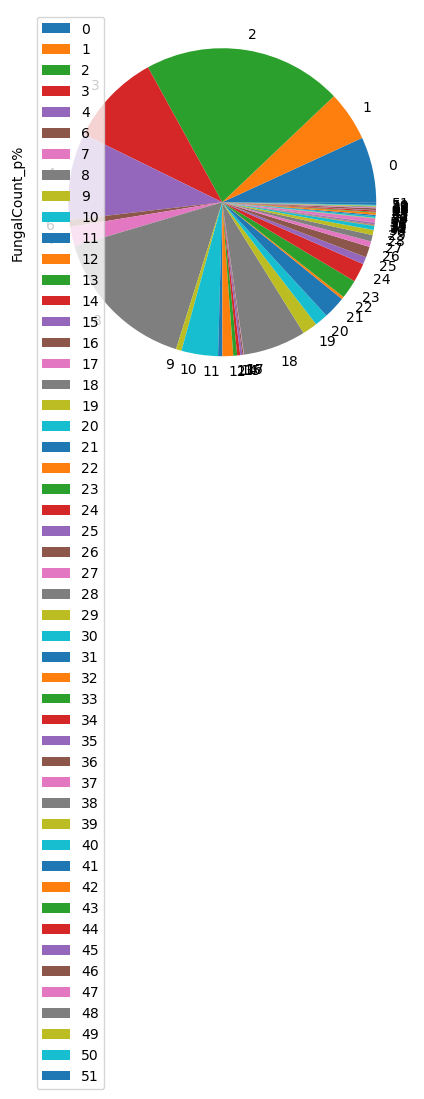

In [98]:
plot_p = ab_p_MycoDB_plot.plot.pie(y="FungalCount_p%", figsize=(5, 5))

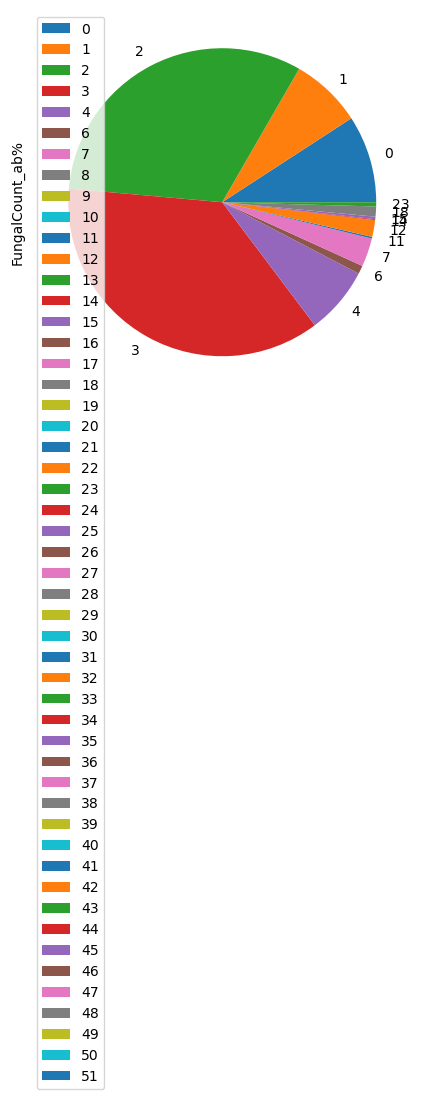

In [99]:
plot_ab = ab_p_MycoDB_plot.plot.pie(y="FungalCount_ab%", figsize=(5, 5))

In [100]:
print(rawdata_BFIBundle)

     Bacterial_associate_taxa    Fungal_host_taxa
0               Achromobacter         Trichoderma
1               Acinetobacter            Fusarium
2                  Agrococcus            Fusarium
3                Azospirillum            Fusarium
4                    Bacillus            Fusarium
...                       ...                 ...
6044         Mycoplasma [MRE]      Lobosporangium
6045         Mycoplasma [MRE]   Actinomortierella
6046         Mycoplasma [MRE]  Lunasporangiospora
6047         Mycoplasma [MRE]         Mortierella
6048         Mycoplasma [MRE]              Podila

[6049 rows x 2 columns]


In [101]:
rawdata_BFIBundle_na.rename(columns={"Fungal_host_taxa" : "FungalGenus"})
print(rawdata_BFIBundle_na)


     Bacterial_associate_taxa    Fungal_host_taxa
0               Achromobacter         Trichoderma
1               Acinetobacter            Fusarium
2                  Agrococcus            Fusarium
3                Azospirillum            Fusarium
4                    Bacillus            Fusarium
...                       ...                 ...
6044         Mycoplasma [MRE]      Lobosporangium
6045         Mycoplasma [MRE]   Actinomortierella
6046         Mycoplasma [MRE]  Lunasporangiospora
6047         Mycoplasma [MRE]         Mortierella
6048         Mycoplasma [MRE]              Podila

[6049 rows x 2 columns]


In [102]:
rawdata_BFIBundle_na["Fungal_host_taxa"] = rawdata_BFIBundle_na["Fungal_host_taxa"].str.lower()
print(rawdata_BFIBundle_na)
fungal_list = ab_p_MycoDB_merged_na["FungalGenus"].tolist()
print(fungal_list)

Filtered_BFIBundle_na = rawdata_BFIBundle_na[rawdata_BFIBundle_na["Fungal_host_taxa"].isin(fungal_list)]

print(Filtered_BFIBundle_na)

     Bacterial_associate_taxa    Fungal_host_taxa
0               Achromobacter         trichoderma
1               Acinetobacter            fusarium
2                  Agrococcus            fusarium
3                Azospirillum            fusarium
4                    Bacillus            fusarium
...                       ...                 ...
6044         Mycoplasma [MRE]      lobosporangium
6045         Mycoplasma [MRE]   actinomortierella
6046         Mycoplasma [MRE]  lunasporangiospora
6047         Mycoplasma [MRE]         mortierella
6048         Mycoplasma [MRE]              podila

[6049 rows x 2 columns]
['claroideoglomus', 'gigaspora', 'rhizoglomus', 'funneliformis', 'glomus', 'septoglomus', 'acaulospora', 'diversispora', 'scutellospora', 'racocetra', 'dentiscutata', 'laccaria', 'rhizopogon', '']
     Bacterial_associate_taxa Fungal_host_taxa
46    Candidatus Moeniiplasma        gigaspora
47    Candidatus Moeniiplasma  claroideoglomus
48    Candidatus Moeniiplasma    funn

In [170]:
counts = {}
for index, row in Filtered_BFIBundle_na.iterrows():
    Fungi = row["Fungal_host_taxa"]
    Bacteria = row["Bacterial_associate_taxa"]
    if Fungi not in counts:
        counts[Fungi] = {}
    if Bacteria not in counts[Fungi]:
        counts[Fungi][Bacteria] = 0
    counts[Fungi][Bacteria] += 1
      
#for Fungi in counts.keys():
    #counts[Fungi]["total"] = sum(counts[Fungi].values())

print (counts)

Bacteria_counts = {}
for Fungi in sorted(counts.keys()):
    for Bacteria in sorted(counts[Fungi]):
        if Bacteria not in Bacteria_counts:
            Bacteria_counts[Bacteria] = 0
        Bacteria_counts[Bacteria] += counts[Fungi][Bacteria]
#del fungal_counts["total"]
print(Bacteria_counts)
Bacteria_counts = Bacteria_counts

{'gigaspora': {'Candidatus Moeniiplasma': 1, 'Candidatus Glomeribacter': 1, 'Mycoplasma [MRE]': 1, 'Achromobacter': 1, 'Aquitalea': 1, 'Bosea': 1, 'Burkholderia': 1, 'Cupriavidus': 1, 'Ensifer': 1, 'Lysobacter': 1, 'Mitsuaria': 1, 'Proteus': 1, 'Pseudomonas': 1, 'Ralstonia': 1, 'Rhizobium': 1, 'Amycolatopsis': 1, 'Arthrobacter': 1, 'Curtobacterium': 1, 'Gordonia': 1, 'Leifsonia': 1, 'Mycobacterium': 1, 'Nocardia': 1, 'Streptomyces': 1, 'Bacillus': 1, 'Brevibacillus': 1, 'Paenibacillus': 1, 'Burkholderia [BRE]': 1}, 'claroideoglomus': {'Candidatus Moeniiplasma': 1, 'Mycoplasma [MRE]': 1}, 'funneliformis': {'Candidatus Moeniiplasma': 1, 'Mycoplasma [MRE]': 1}, 'scutellospora': {'Candidatus Moeniiplasma': 1, 'Burkholderia [BRE]': 1}, 'glomus': {'Candidatus Moeniiplasma': 1, 'Mycoplasma [MRE]': 1, 'Pseudomonas': 1, 'Paenibacillus': 2}, 'dentiscutata': {'Candidatus Moeniiplasma': 1, 'Mycoplasma [MRE]': 1, 'Burkholderia [BRE]': 1}, 'racocetra': {'Candidatus Moeniiplasma': 1, 'Burkholderia [B

In [173]:
Fungi = counts.keys()
print(Fungi)
Bacteria = set()
for Fungi in counts.keys():
    Bacteria.update(counts[Fungi].keys())
#Bacteria.remove("total")

#print (sorted(fungi_p))

Bacteria_cols = sorted(Bacteria)

heatmap_BFI = []
#Bacteria.add('')
#heatmap_BFI.append(sorted(Bacteria))
#print(heatmap_p)

Fungi_rows = sorted(counts.keys())

for Fungi in Fungi_rows:
    new_row = []
    #new_row.append(Fungi)
    #print(counts[Fungi].keys())
    for Bacteria in Bacteria_cols: #sorted(counts[Fungi].keys()):
        entry = counts[Fungi].get(Bacteria, 0)
        #print(entry)
        new_row.append(entry)
    heatmap_BFI.append(new_row)
pprint.pprint(heatmap_BFI)




dict_keys(['gigaspora', 'claroideoglomus', 'funneliformis', 'scutellospora', 'glomus', 'dentiscutata', 'racocetra', 'laccaria', 'rhizopogon', 'diversispora', 'acaulospora'])
[[0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,


In [174]:
heatmap_BFI_df = pd.DataFrame(heatmap_BFI)

heatmap_BFI_df.to_csv('heatmap_BFI_df.csv', sep=',', index=True, encoding='utf-8')

heatmap_BFI_mergedata = pd.read_csv('heatmap_BFI_df.csv')

print(heatmap_BFI_mergedata)


    Unnamed: 0  0  1  2  3  4  5  6  7  8  ...  127  128  129  130  131  132  \
0            0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0   
1            1  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0   
2            2  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0   
3            3  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0   
4            4  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0   
5            5  1  0  0  0  0  0  0  0  0  ...    0    0    0    1    0    0   
6            6  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0   
7            7  0  1  0  0  1  0  1  1  0  ...    1    1    0    0    1    0   
8            8  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0   
9            9  0  0  1  1  0  1  1  0  1  ...    0    1    1    0    0    1   
10          10  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0   

    133  134  135  136  
0     0    0  

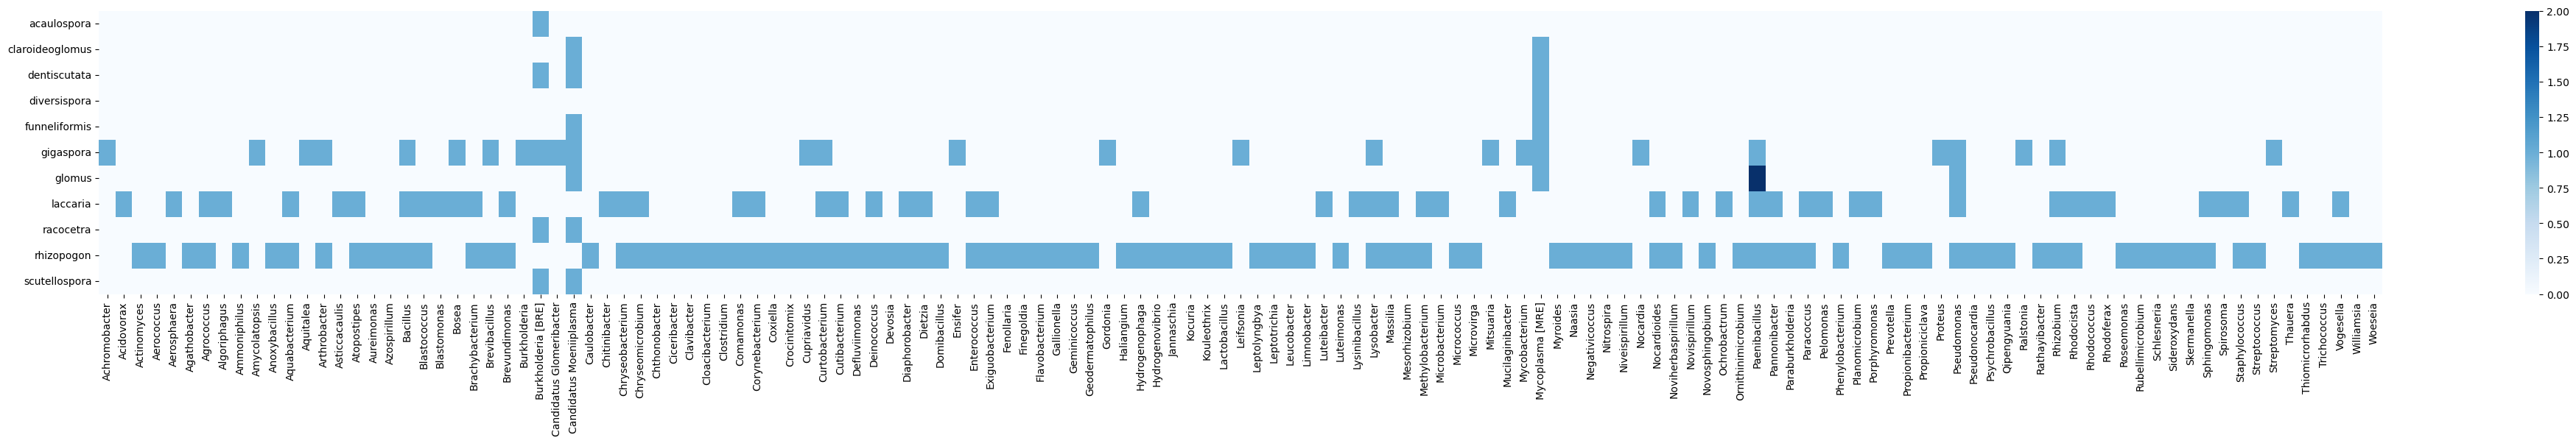

In [180]:
fig, ax = plt.subplots(figsize=(50,5))

heatmap_BFI_img = sns.heatmap(heatmap_BFI, cmap='Blues', xticklabels=Bacteria_cols, yticklabels=Fungi_rows, ax=ax)


In [140]:

bacteria_count_df.to_csv('bacteria_count_df.csv', sep=',', index=True, encoding='utf-8')

bacteria_mergedata = pd.read_csv('bacteria_count_df.csv')
bacteria_mergedata.rename( columns={'Unnamed: 0':'Bacterial_associate_taxa'}, inplace=True )
bacteria_mergedata.rename( columns={'0':'Fungal_host_taxa'}, inplace=True )

NameError: name 'bacteria_count_df' is not defined

In [139]:
print (bacteria_mergedata)

     Bacterial_associate_taxa  Fungal_host_taxa
0     Candidatus Moeniiplasma                 7
1    Candidatus Glomeribacter                 1
2            Mycoplasma [MRE]                 6
3               Achromobacter                 1
4                   Aquitalea                 1
..                        ...               ...
133              Trichococcus                 1
134                Williamsia                 1
135                   Woeseia                 1
136           Hydrogenovibrio                 1
137          Thiomicrorhabdus                 1

[138 rows x 2 columns]
